### 딥러닝이란?
- 인간의 신경망을 모방하여, 학습하고 예측하는 기술
- 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어남
- 인간의 뉴런 == 선형모델(y = wk + b)


#### Tensor Flow : 구글이 만든 딥러닝 프레임워크

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/인사교/DL

/content/drive/MyDrive/인사교/DL


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('./data/student-mat.csv', delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### 목표
- 공부시간에 따른 학생의 성적을 예측하는 회귀 모델 만들기!
  - ML과 DL 사용법 차이 확인해보기!

| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [13]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### X(문제), y(정답) qnsfl
- X : studytime
- y : G3

In [18]:
X = data[['studytime']]
y = data['G3']

In [19]:
X.shape, y.shape

((395, 1), (395,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2024)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 1), (119, 1), (276,), (119,))

#### ML(sklearn)과 DL(tensorflow, keras) 모델링 비교
- ML(skearn)
  - 모델 생성(완성된 객체 초기화) -> 학습 -> 예측 -> 평가
  - ex.완제품 로봇에서 도색(하이퍼 파라미터)하는 느낌
---
- DL(tensorflow)
  - 모델생성(모델을 조립식

##### 머신러닝


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
linear_reg = LinearRegression() # 모델 초기화
linear_reg.fit(X_train, y_train) # 모델 학습
y_pred = linear_reg.predict(X_test) # 모델 예측

print(f"평균제곱오차 : {mean_squared_error(y_test, y_pred)}") # 모델 평가

평균제곱오차 : 19.777359638206264


##### 딥러닝

In [27]:
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층, 완전연결층(중간층, 출력층)

In [43]:
# 1. 신경망 구조 설계

# 뼈대 생성
model = Sequential()
# 입력층 -> 입력 데이터의 형태를 지정
model.add(InputLayer(shape = (1, ))) # 여기서는 특성의 개수를 1로 설정
# 중간층(은닉층)
# model.add(Dense(units = 64, activation = 'sigmoid'))
# model.add(Dense(units = 32, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
# 출력층
model.add(Dense(units = 1))

In [47]:
  # 2. 신경망 학습 방법
model.compile(
    loss = 'mse', # 오차값 뽑아주는 도구(손실함수)
    # optimizer = 'SGD', # 최적화 함수(경사하강법 종류 지정)
    optimizer = 'Adam', # 최적화 함수(경사하강법 종류 지정)
    metrics = ['mse'] # 최종평가지표
    )

In [48]:
# 3.모델 학습
h = model.fit(X_train, y_train,
              validation_split = 0.2, # train set에서 20%를 검증 데이터셋으로
              epochs = 20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 111.8811 - mse: 111.8811 - val_loss: 121.1939 - val_mse: 121.1939
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 107.5667 - mse: 107.5667 - val_loss: 115.8563 - val_mse: 115.8563
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 105.4003 - mse: 105.4003 - val_loss: 110.5660 - val_mse: 110.5660
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 92.4532 - mse: 92.4532 - val_loss: 104.8986 - val_mse: 104.8986
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 88.6871 - mse: 88.6871 - val_loss: 98.8683 - val_mse: 98.8683
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84.5135 - mse: 84.5135 - val_loss: 92.3346 - val_mse: 92.3346
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 79.4855 - mse: 79.4855 - val_loss: 85.2705 - val_mse: 85.2705
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.4800 - mse: 72.4800 - val_loss: 77.9367 - val_mse: 77.9367
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━

In [49]:
# 4. 예측, 평가
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.5938 - mse: 24.5938 


[25.75201416015625, 25.75201416015625]

In [50]:
h.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

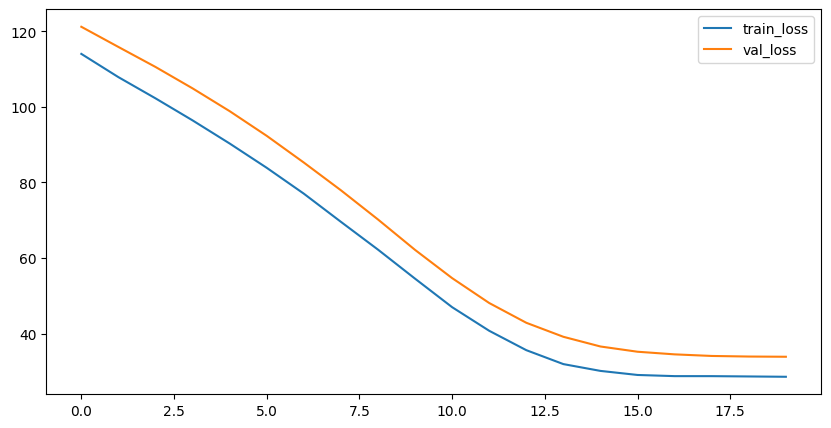

In [51]:
# 모델 복잡도 곡선(학습결과 시각화)
plt.figure(figsize = (10, 5))
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

#### 문제데이터 4ea으로 학습시키기!
- traveltime
- studytime
- freetime
- health

In [54]:
X1 = data[['studytime','traveltime', 'freetime', 'health']]
y1 = data['G3']

In [57]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 2024)

In [58]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((276, 4), (119, 4), (276,), (119,))

In [62]:
# 1. 신경망 구조 설계

# 뼈대 생성
model1 = Sequential()
# 입력층 -> 입력 데이터의 형태를 지정
model1.add(InputLayer(shape = (4, ))) # 여기서는 특성의 개수를 1로 설정
# 중간층(은닉층)
# model.add(Dense(units = 64, activation = 'sigmoid'))
# model.add(Dense(units = 32, activation = 'sigmoid'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
# 출력층
model1.add(Dense(units = 1))

In [63]:
  # 2. 신경망 학습 방법
model1.compile(
    loss = 'mse', # 오차값 뽑아주는 도구(손실함수)
    # optimizer = 'SGD', # 최적화 함수(경사하강법 종류 지정)
    optimizer = 'Adam', # 최적화 함수(경사하강법 종류 지정)
    metrics = ['mse'] # 최종평가지표
    )

In [64]:
# 3.모델 학습
h = model1.fit(X1_train, y1_train,
              validation_split = 0.2, # train set에서 20%를 검증 데이터셋으로
              epochs = 20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 116.5859 - mse: 116.5859 - val_loss: 95.7950 - val_mse: 95.7950
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.3578 - mse: 81.3578 - val_loss: 61.7717 - val_mse: 61.7717
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.1115 - mse: 45.1115 - val_loss: 33.5331 - val_mse: 33.5331
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.2269 - mse: 27.2269 - val_loss: 27.1498 - val_mse: 27.1498
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.0160 - mse: 27.0160 - val_loss: 27.3459 - val_mse: 27.3459
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.3999 - mse: 25.3999 - val_loss: 26.6394 - val_mse: 26.6394
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.5180 - mse: 19.5180 - val_loss: 27.7239 - val_mse: 27.7239
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.5373 - mse: 23.5373 - val_loss: 27.1431 - val_mse: 27.1431
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/st

In [65]:
# 4. 예측, 평가
model1.evaluate(X1_test, y1_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.2806 - mse: 21.2806


[23.782733917236328, 23.782733917236328]

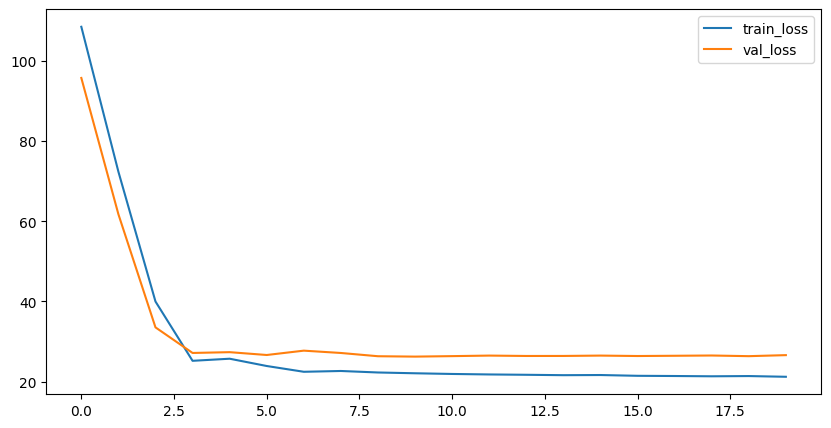

In [66]:
# 모델 복잡도 곡선(학습결과 시각화)
plt.figure(figsize = (10, 5))
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()